# Reading data

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("balanced_spam_data.csv", encoding = "ISO-8859-1")

In [3]:
data.head(n=10)

Unnamed: 0                                                sms labels
0        1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1        2339  My sis is catching e show in e afternoon so i'...    ham
2        1905                             What happened to date?    ham
3        1898                           K:)k.are you in college?    ham
4        2759                        S but mostly not like that.    ham
5         704  Monthly password for wap. mobsi.com is 391784....   spam
6         541  TheMob>Yo yo yo-Here comes a new selection of ...   spam
7        1804                          2 celebrate my bÃ¥Ãday,?    ham
8         661  FreeMsg Hey there darling it's been 3 week's n...   spam
9          21  \ For the most sparkling shopping 2025050 or v...   spam

In [4]:
data['sms'][2]

'What happened to date?'

# Data Analysis

In [5]:
data.labels.value_counts()

spam    1494
ham     1494
Name: labels, dtype: int64

In [6]:
data.sms[100] #spam data example

"Yeah, don ' go t to bed I, ' be ll before back midnight"

<AxesSubplot:>

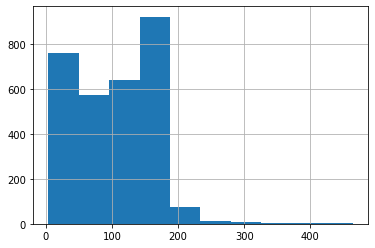

In [7]:
data['sms'].str.len().hist()

In [8]:
data['sms'].str.split().map(lambda x : len(x)).hist()

<AxesSubplot:>

all_numbers = [1,2,3,4,5,6,7,8]

def check_even(x):
    return x%2==0

lambda x: x%2 == 0

even = map(check_even,all_numbers)

The movie was very good. -- Positive
I didn't like the movie.

# Data Cleaning

In [9]:
import nltk
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
porter = PorterStemmer()
stop_words = set(stopwords.words('english'))

In [10]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

columns_to_drop = ['Unnamed: 2',"Unnamed: 3","Unnamed: 4"]
data.drop(columns_to_drop,inplace=True, axis=1)

In [11]:
data

Unnamed: 0                                                sms labels
0           1737  Good afternoon starshine! How's my boytoy? Doe...    ham
1           2339  My sis is catching e show in e afternoon so i'...    ham
2           1905                             What happened to date?    ham
3           1898                           K:)k.are you in college?    ham
4           2759                        S but mostly not like that.    ham
...          ...                                                ...    ...
2983        1302  8007 mob every week just txt NOKIA to 8007 txt...   spam
2984         675  SMS. ac Sptv: The New Jersey Devils and the De...   spam
2985         521  Urgent! Please call 0906346330. Your ABTA comp...   spam
2986         145  Urgent UR awarded a complimentary trip to Euro...   spam
2987        1967                               Where r we converge?    ham

[2988 rows x 3 columns]

import nltk
from nltk.tokenize import word_tokenize, sent_tokenize

word_tokenized = word_tokenize("This sentence should be word tokenized.")
sent_tokenized = sent_tokenize("This is first sentence, This is scond sentence.")

!pip install spacy

from spacy.lang.en import English
nlp = English()
tokens = nlp("This sentence should be tokenized.")
tokens_text = [t.text for t in tokens]

tokens_text

word_tokenized

In [12]:
def clean_text(text):
    """
    To clean a textual data
    params: text : str
    return final_text : str
    """
    # remove punctuations from text
    punctuations_removed = text.translate(str.maketrans('', '', string.punctuation))
    tokens = word_tokenize(punctuations_removed)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    #stemming the tokens
    stemmed = [porter.stem(word) for word in words]
    final_text = ' '.join(stemmed)
    return final_text

## Stemming 
playing --> play


## Lemmatization
{
"played":"play",
"playing":"play"
}


played --> lemma

In [13]:
data['sms'] = data['sms'].apply(clean_text)

In [14]:
data

Unnamed: 0                                                sms labels
0           1737  good afternoon starshin how boytoy crave yet a...    ham
1           2339  si catch e show e afternoon im watch w c u wan...    ham
2           1905                                        happen date    ham
3           1898                                       kkare colleg    ham
4           2759                                        mostli like    ham
...          ...                                                ...    ...
2983        1302  mob everi week txt nokia txting get tell mate ...   spam
2984         675  sm ac sptv new jersey devil detroit red wing p...   spam
2985         521  urgent pleas call abta complimentari spanish h...   spam
2986         145  urgent ur award complimentari trip eurodisinc ...   spam
2987        1967                                          r converg    ham

[2988 rows x 3 columns]

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn import metrics
from sklearn.svm import SVC

In [16]:
X_train, X_test, y_train, y_test = train_test_split(data['sms'], data['labels'], test_size = 0.2, random_state = 2)

In [17]:
X_train_df = X_train.to_frame()
y_train_df = y_train.to_frame()
X_test_df = X_test.to_frame()
y_test_df = y_test.to_frame()

In [18]:
train_df =pd.merge(X_train_df, y_train_df, right_index = True, 
               left_index = True)
test_df =pd.merge(X_test_df, y_test_df, right_index = True, 
               left_index = True)

In [19]:
train_df

sms labels
1685                                     yeah mayb leav    ham
1431                             yeah quit bit left get    ham
2449  bathroom halt lodg far tone repli plosiv speec...   spam
831   tell bad charact u dnt lik chang tri lt gt add...    ham
611          mean come chase state watch mani movi want    ham
...                                                 ...    ...
2514              urgent mobil number award claim valid   spam
2347  voucher dear holder claim week offer pc go htt...   spam
1608  urgent pleas call abta complimentari holiday s...   spam
2541                                          buy today    ham
2575                                           open mca    ham

[2390 rows x 2 columns]

In [20]:
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_test = Encoder.fit_transform(y_test)

In [21]:
X_test

338     urgent call landlin complimentari ibiza holida...
2793    ur rington servic chang innoc credit go com ch...
659     tone club sub expir resub repli monoc mono pol...
1861    sunshin quiz wkli q win top soni dvd player u ...
476     gent tri contact last weekend draw show prize ...
                              ...                        
504                                custom place u cal sir
2590                              come din c yup cut hair
354     pleas yell custom servic repres freephon gain ...
639     privat account statement show unredeem point c...
37                               text messag valid decemb
Name: sms, Length: 598, dtype: object

# converting text to numerical representation


In [22]:
Tfidf_vect = TfidfVectorizer(max_features=5000)
Tfidf_vect.fit(data['sms'])
X_train = Tfidf_vect.transform(X_train)
X_test = Tfidf_vect.transform(X_test)

# Saving vectorizer to use for other data



In [23]:
import pickle
pickle.dump(Tfidf_vect, open("models/tfidf_vectorizer.pkl", "wb"))

# Building SVC classifier

In [24]:
classifier = SVC()

# Training the classifier



In [25]:
import time
start_time = time.time()
classifier.fit(X_train, y_train)
end_time = time.time()
training_time = end_time - start_time

In [26]:
training_time

1.0490431785583496

In [27]:
y_pred = classifier.predict(X_test)

In [28]:
y_pred

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,

## Adding SVM prediction to result_test_data.csv file

In [29]:
test_result_data = pd.read_csv("results/result_testing_balanced_data.csv")
svm_predictions = y_pred.tolist()
test_result_data['SVM prediction'] = svm_predictions
test_result_data.to_csv("results/test_result_data_with_SVM_NaiveBayes_balanced.csv")

In [30]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.9732441471571907


In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       302
           1       0.98      0.97      0.97       296

    accuracy                           0.97       598
   macro avg       0.97      0.97      0.97       598
weighted avg       0.97      0.97      0.97       598



# Saving model

In [32]:
import pickle
pickle.dump(classifier, open("models/SVM_spam_classification_model_balanced", 'wb'))
 

## Visualizing evaluation metrics

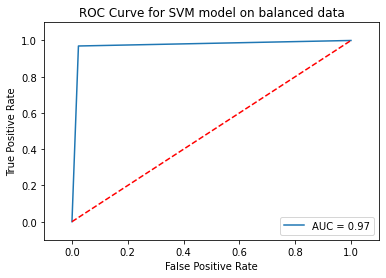

In [33]:
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred)

auc_score = metrics.auc(fpr, tpr)

# clear current figure
plt.clf()

plt.title('ROC Curve for SVM model on balanced data')
plt.plot(fpr, tpr, label='AUC = {:.2f}'.format(auc_score))

# it's helpful to add a diagonal to indicate where chance 
# scores lie (i.e. just flipping a coin)
plt.plot([0,1],[0,1],'r--')

plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

plt.legend(loc='lower right')
plt.savefig('results/svm_roc_balanced.jpg')
plt.show()


In [34]:
import itertools
import numpy as np
matrix = confusion_matrix(y_test,y_pred)

plt.clf()

# place labels at the top
plt.gca().xaxis.tick_top()
plt.gca().xaxis.set_label_position('top')

# plot the matrix per se
plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)

# plot colorbar to the right
plt.colorbar()

fmt = 'd'

# write the number of predictions in each bucket
thresh = matrix.max() / 2.
for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):

    # if background is dark, use a white number, and vice-versa
    plt.text(j, i, format(matrix[i, j], fmt),
         horizontalalignment="center",
         color="white" if matrix[i, j] > thresh else "black")

class_names = ['ham','spam']
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)
plt.tight_layout()
plt.ylabel('True label',size=14)
plt.xlabel('Predicted label',size=14)
plt.savefig('results/svm_confusion_matrix_balanced.jpg')
plt.show()

# Implement k fold cross validation



In [35]:
from sklearn.model_selection import KFold
import numpy as np


In [36]:
Encoder = LabelEncoder()
y = Encoder.fit_transform(data['labels'])
X= data['sms']
X = np.array(X)
kf = KFold(n_splits=10, random_state=4, shuffle=True)


In [37]:
accuracy_list = []
for train_index,test_index in kf.split(X):
    X_train = X[train_index]
    X_test = X[test_index]
    y_train = y[train_index]
    y_test = y[test_index]
    
    Tfidf_vect.fit(X_train)
    
    X_train = Tfidf_vect.transform(X_train)
    X_test = Tfidf_vect.transform(X_test)
    
    classifier = SVC()

    classifier.fit(X_train,y_train)
    y_pred = classifier.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy)
    print("Accuracy in this fold is",accuracy)
    
    print('\n')

[[145   2]
 [  6 146]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       147
           1       0.99      0.96      0.97       152

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

Accuracy in this fold is 0.9732441471571907


[[141   1]
 [  7 150]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       142
           1       0.99      0.96      0.97       157

    accuracy                           0.97       299
   macro avg       0.97      0.97      0.97       299
weighted avg       0.97      0.97      0.97       299

Accuracy in this fold is 0.9732441471571907


[[152   4]
 [  6 137]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       156
           1       0.97      0.96      0.96       143

    accuracy         

In [38]:
accuracy_list = [i*100 for i in accuracy_list]

In [39]:
fold_list = [1,2,3,4,5 ,6,7,8,9,10]

In [40]:
import matplotlib.pyplot as plt
fig = plt.figure()
axes = fig.add_axes([0,0,1,1])
axes = plt.gca()
axes.set_ylim([95,100])
# axes.set_xlim([0,4])
axes.xaxis.set_ticks(np.arange(0, 4, 1))
models = fold_list
accuracy_scores = accuracy_list
axes.bar(models,accuracy_scores)
plt.xlabel('Folds')
plt.ylabel('Accuracy Scores')
plt.title('K fold cross validation results')
fig.savefig('results/k_fold_cross_validation_result_svm_balanced.jpg', bbox_inches='tight')

# plt.savefig('results/comparision_chart.png')
plt.show()
